In [ ]:
from google.colab import files
uploaded = files.upload()

Saving placement.csv to placement.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

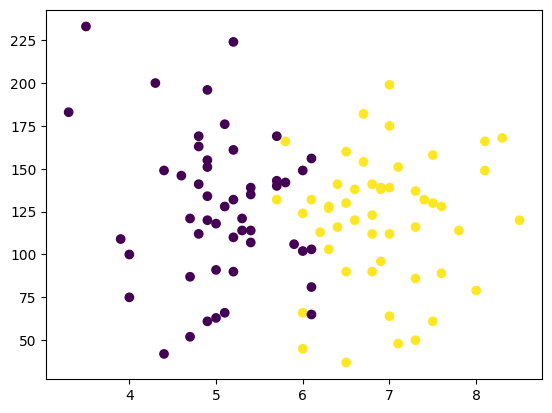

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

In [ ]:
X_train

,cgpa,iq
68,4.0,75.0
41,5.4,114.0
70,6.3,127.0
84,5.7,169.0
64,7.0,64.0
...,...,...
22,4.9,120.0
19,5.2,132.0
43,6.8,141.0
54,6.4,141.0


In [ ]:
X_test

,cgpa,iq
46,5.3,114.0
63,6.3,128.0
34,4.8,163.0
77,7.3,50.0
14,6.1,103.0
6,5.7,143.0
10,6.0,45.0
35,6.8,90.0
52,7.0,175.0
55,7.8,114.0


In [ ]:
y_train

68    0
41    0
70    1
84    0
64    1
     ..
22    0
19    0
43    1
54    1
94    0
Name: placement, Length: 90, dtype: int64

In [ ]:
y_test

46    0
63    1
34    0
77    1
14    0
6     0
10    1
35    1
52    1
55    1
Name: placement, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

In [32]:
X_test

array([[-0.56626158, -0.27420593],
       [ 0.29752727,  0.08088089],
       [-0.998156  ,  0.96859794],
       [ 1.16131612, -1.89745997],
       [ 0.1247695 , -0.55320272],
       [-0.22074604,  0.46133105],
       [ 0.03839062, -2.02427669],
       [ 0.72942169, -0.8829262 ],
       [ 0.90217946,  1.27295807],
       [ 1.59321054, -0.27420593]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()

In [35]:
clf.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred = clf.predict(X_test)

In [37]:
y_test

46    0
63    1
34    0
77    1
14    0
6     0
10    1
35    1
52    1
55    1
Name: placement, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

0.8

In [47]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

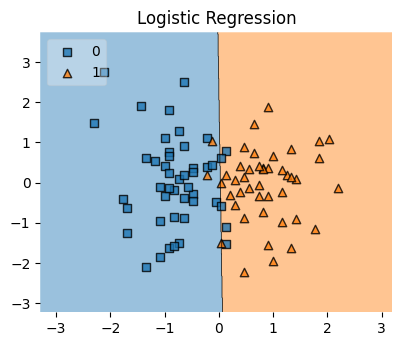

In [57]:
clf = LogisticRegression(random_state=0)

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression']

# Assuming X and y are your complete dataset
# Replace them with your actual data
for lab, grd in zip(labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X_train, y_train.values, clf = clf, legend=2, ax=ax)
    plt.title(lab)

plt.show()


In [58]:
import pickle

In [59]:
pickle.dump(clf,open('model.pkl','wb'))